In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numba as nb

In [2]:
# constants
n = 1 # times sampling frequency
wds = np.linspace(-10000,10000,41)
t = np.linspace(0,1,1023*n)*1e-3
# GPS PRN Extraction
codesFile = scipy.io.loadmat("codes_L1CA.mat")
codes = np.array(codesFile['codes_L1CA'])

In [3]:
def genA():
    A = [[np.repeat(np.roll(codes[:,satNum],-tau),n) for tau in range(0,1023)]for satNum in range(0,32)]
    return A

In [4]:

a = np.array(genA())

In [5]:
sirPRNI = np.repeat(np.roll(codes[:,20],-82),n)*np.cos(2*np.pi*675*t)
sirPRNQ = np.repeat(np.roll(codes[:,20],-82),n)*np.sin(2*np.pi*675*t)

In [14]:
@nb.njit()
def serialSearch(I,Q,codes,wds,n,a):
    corrR=np.empty((32,41,1023))
    corrI=np.empty((32,41,1023))
    for y in range(0,41):
        amodR = a*np.cos(2*np.pi*wds[y]*t)
        amodI = a*np.sin(-2*np.pi*wds[y]*t)
#         amodR = a*np.cos(2*np.pi*675*t)
#         amodI = a*np.sin(-2*np.pi*675*t)
        for x in range(0,32):
            corrR[x,y] = np.dot(amodR[x],I)-np.dot(amodI[x],Q)
            corrI[x,y] = np.dot(amodR[x],Q)+np.dot(amodI[x],I)

    return corrR,corrI
#     return corrR

In [15]:
%%time
corrR,corrI = serialSearch(sirPRNI,sirPRNQ,codes,wds,n,a)

CPU times: total: 7.27 s
Wall time: 28.3 s


In [19]:
corr = np.sqrt(corrR**2+corrI**2)

In [20]:
satNum,wdstar,taustar = np.unravel_index(corr.argmax(), corr.shape) 

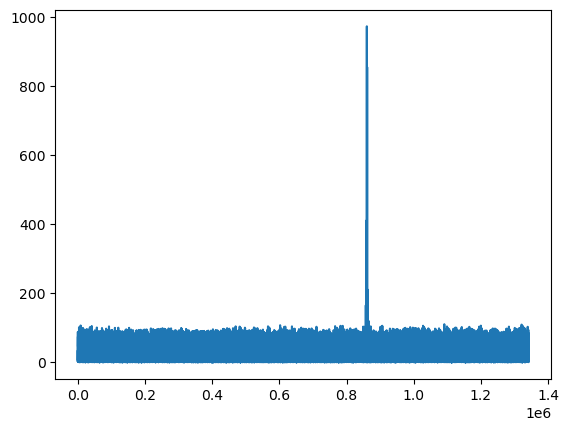

In [21]:
plt.plot(corr.flatten())

In [22]:
satNum

20

In [23]:
taustar

82

In [24]:
wds[wdstar]

500.0